In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Part A: Basic EDA

In [4]:
# 1. to Load the dataset and display the first 5 rows.
# to load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/ai_assistant_usage_student_life.csv")
#to display the first 5 rows in the data
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [5]:
# 2. Check the dataset shape (rows, columns)
df.shape

(10000, 11)

In [6]:
# 3. Display column names and their data types
df.dtypes

,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [7]:
#4. Check for missing values in each column.
df.isnull().sum()

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


In [8]:
# 5. Show summary statistics for SessionLengthMin and TotalPrompts.
df[['SessionLengthMin', 'TotalPrompts']].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


In [9]:
# 6. Find the number of unique values in StudentLevel, Discipline, and TaskType
df[['StudentLevel', 'Discipline', 'TaskType']].nunique()


,0
StudentLevel,3
Discipline,7
TaskType,6


In [10]:
#7. Which TaskType is the most common?
df['TaskType'].value_counts()


,count
TaskType,
Writing,3101
Studying,2040
Homework Help,1959
Coding,1948
Brainstorming,476
Research,476


In [11]:
# 8. Calculate the average SessionLengthMin for each StudentLevel
avg_session_len= df.groupby('StudentLevel')['SessionLengthMin'].mean()
print(avg_session_len)

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


#Part B: Visualization

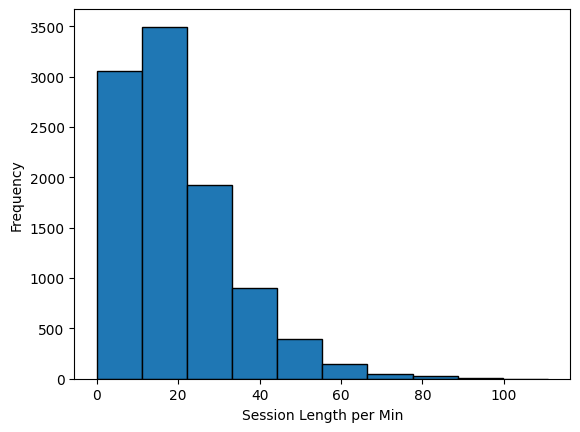

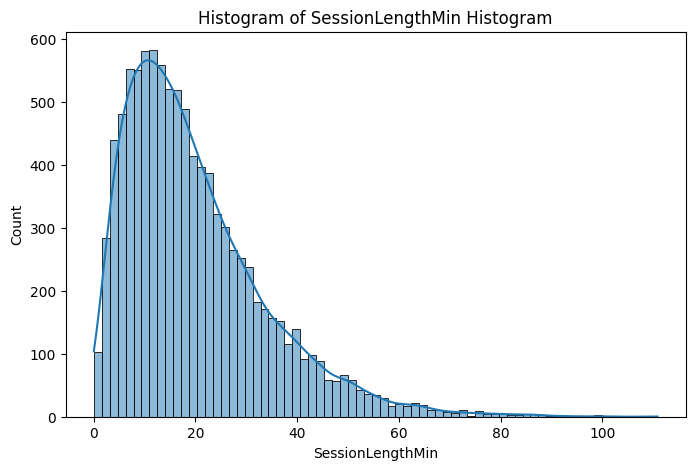

In [12]:
# 9. Plot a histogram of SessionLengthMin.
plt.hist(df['SessionLengthMin'], bins=10, edgecolor="black")
plt.xlabel('Session Length per Min')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 5)) #seting size of our figure length n width
sns.histplot(df, x=df['SessionLengthMin'], kde= True) # to check if distribution is skewed or not
plt.title('Histogram of SessionLengthMin Histogram')
plt.show()

Text(0.5, 1.0, 'Bar Chart of Session Counts by Student Level')

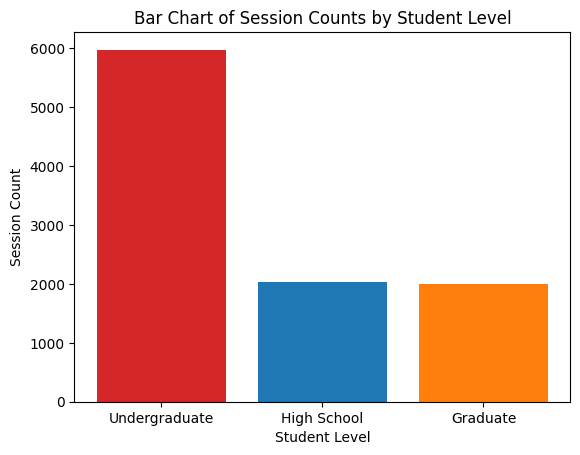

In [13]:
# 10. Create a bar chart of session counts by StudentLevel
session_counts = df['StudentLevel'].value_counts()
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.bar(session_counts.index, session_counts.values, color=bar_colors)
plt.xlabel('Student Level')
plt.ylabel('Session Count')
plt.title('Bar Chart of Session Counts by Student Level')

/tmp/ipython-input-4276801120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TaskType', palette='magma')


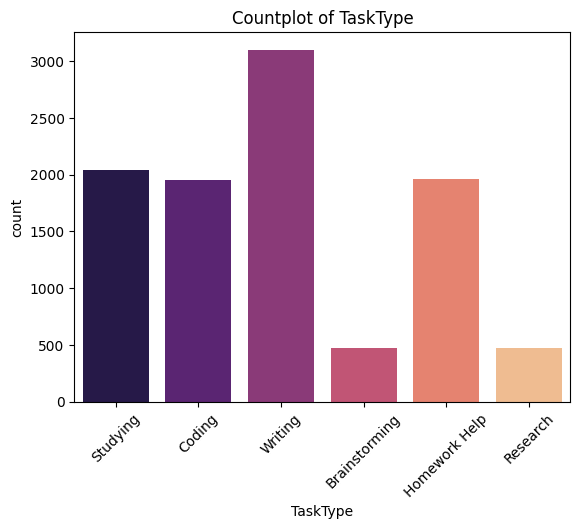

In [14]:
# 11. Make a countplot of TaskType using Seaborn
sns.countplot(data=df, x='TaskType', palette='magma')
plt.xticks(rotation=45)
plt.title('Countplot of TaskType')
plt.show()



/tmp/ipython-input-2292797534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='StudentLevel', y='SessionLengthMin', palette='rocket')


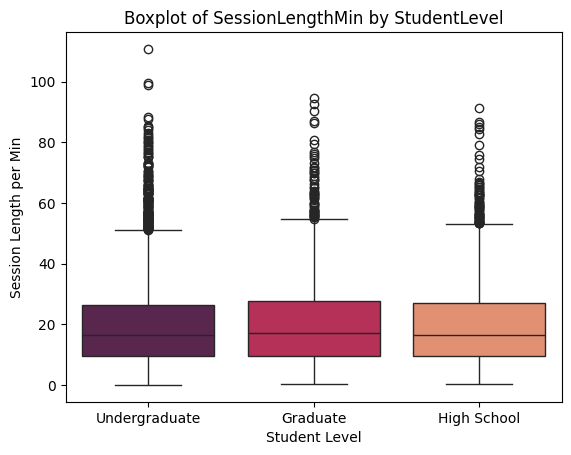

In [15]:
# 12. Plot a boxplot of SessionLengthMin grouped by StudentLevel
sns.boxplot(data=df, x='StudentLevel', y='SessionLengthMin', palette='rocket')
plt.xlabel('Student Level')
plt.ylabel('Session Length per Min')
plt.title('Boxplot of SessionLengthMin by StudentLevel')
plt.show()

Text(0.5, 1.0, 'Proportion of Final Outcomes')

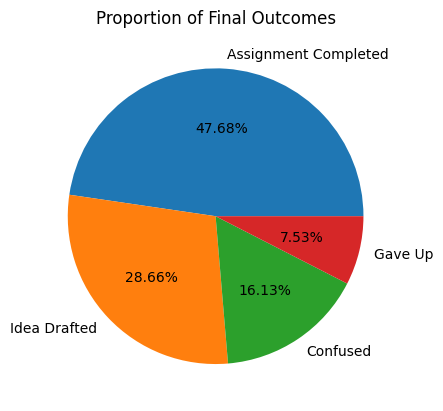

In [16]:
# 13. Create a pie chart showing proportions of FinalOutcome.
outcome_proportions = df['FinalOutcome'].value_counts(normalize=True)
plt.pie(outcome_proportions.values, labels=outcome_proportions.index, autopct='%0.2f%%')
plt.title('Proportion of Final Outcomes')


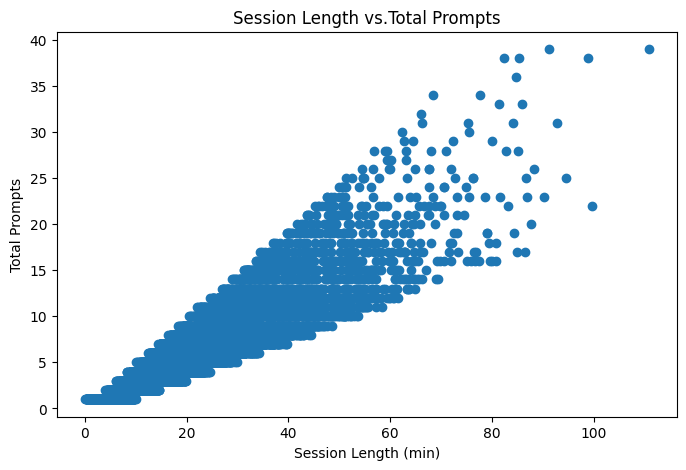

In [17]:
# 14. Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(8,5))
plt.scatter(df["SessionLengthMin"],df["TotalPrompts"])
plt.xlabel("Session Length (min)")
plt.ylabel("Total Prompts")
plt.title("Session Length vs.Total Prompts")
plt.show()

Text(0.5, 1.0, 'Line Chart of Average AI Assistance Level over Time')

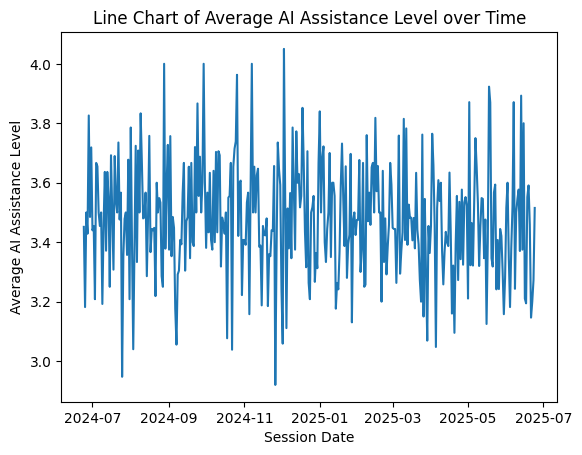

In [18]:
# 15. Plot a line chart of average AI_AssistanceLevel over time (SessionDate)
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
avg_ai_level_over_time = df.groupby('SessionDate')['AI_AssistanceLevel'].mean()
plt.plot(avg_ai_level_over_time.index, avg_ai_level_over_time.values)
plt.xlabel('Session Date')
plt.ylabel('Average AI Assistance Level')
plt.title('Line Chart of Average AI Assistance Level over Time')

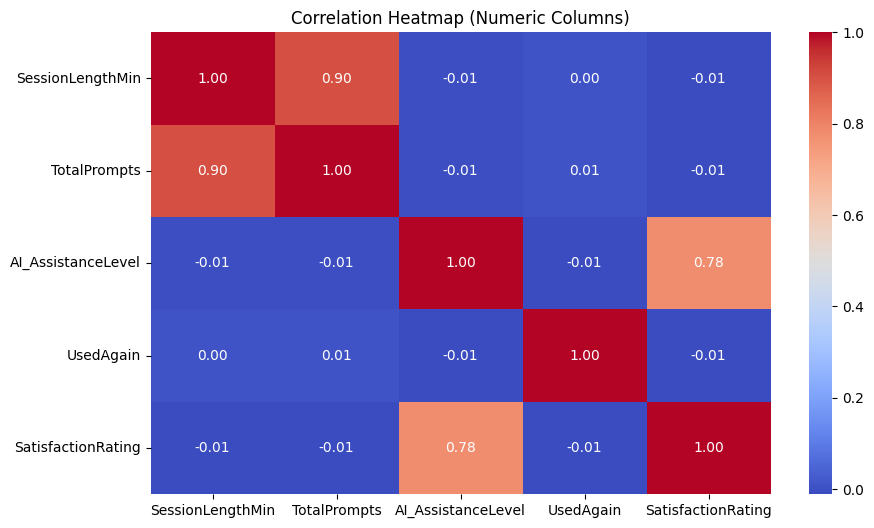

In [19]:
# 16. Create a heatmap of correlations among numeric features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

# Part C: GroupBy & Aggregations

In [20]:
# 17. Find the average SessionLengthMin for each TaskType
avg_session_len_by_task = df.groupby('TaskType')['SessionLengthMin'].mean()
print(avg_session_len_by_task)



TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [21]:
# 18. Which Discipline had the most sessions?
discipline_sessions = df['Discipline'].value_counts()
most_sessions_discipline = discipline_sessions.idxmax()
print(f"The discipline with the most sessions is: {most_sessions_discipline}")

The discipline with the most sessions is: Biology


In [22]:
# 19. Compare average AI_AssistanceLevel across StudentLevel column
avg_ai_level_by_student_level = df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
avg_ai_level_by_student_level


,AI_AssistanceLevel
StudentLevel,
Graduate,3.469674
High School,3.477060
Undergraduate,3.483607


In [23]:
# 20. Find the most common FinalOutcome for Graduate students
graduate_outcomes = df[df['StudentLevel'] == 'Graduate']['FinalOutcome'].value_counts()
most_common_outcome_graduate = graduate_outcomes.idxmax()
print(f"The most common FinalOutcome for Graduate students is: {most_common_outcome_graduate}")


The most common FinalOutcome for Graduate students is: Assignment Completed


In [24]:
# 21. Calculate the median SessionLengthMin for each FinalOutcome.
median_session_len_by_outcome = df.groupby('FinalOutcome')['SessionLengthMin'].median()
median_session_len_by_outcome

,SessionLengthMin
FinalOutcome,
Assignment Completed,16.570
Confused,16.040
Gave Up,17.290
Idea Drafted,17.085


# Part D: Feature Engineering & Encoding


In [25]:
# 22. Convert SessionDate into Year, Month, and Day columns
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['Day'] = df['SessionDate'].dt.day
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18


In [26]:
# 23. Encode StudentLevel using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['StudentLevel_encoded'] = label_encoder.fit_transform(df['StudentLevel'])
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [27]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [28]:
# 24. Apply One-Hot Encoding to TaskType
df_encoded = pd.get_dummies(df['TaskType'],drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_encoded}\n")

df_encoded=df_encoded.astype(int)#0s and 1s

print(df_encoded.head())

One-Hot Encoded Data using Pandas:
      Coding  Homework Help  Research  Studying  Writing
0      False          False     False      True    False
1      False          False     False      True    False
2       True          False     False     False    False
3       True          False     False     False    False
4      False          False     False     False     True
...      ...            ...       ...       ...      ...
9995   False          False     False      True    False
9996   False          False     False     False     True
9997   False          False     False      True    False
9998   False          False     False     False     True
9999   False          False     False     False     True

[10000 rows x 5 columns]

   Coding  Homework Help  Research  Studying  Writing
0       0              0         0         1        0
1       0              0         0         1        0
2       1              0         0         0        0
3       1              0         0    

In [29]:
# 25. Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin
df['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin']
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057


In [30]:
# 26. Bin SessionLengthMin into categories: Short, Medium, Long
df['SessionLengthCategory'] = pd.cut(df['SessionLengthMin'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute,SessionLengthCategory
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564,Medium
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365,Short
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146,Short
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270,Short
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057,Short


### Part E: Machine Learning (Classification Models)


In [31]:
# Apply One-Hot Encoding to 'Discipline' and 'SessionLengthCategory'
df_encoded = pd.get_dummies(df, columns=['Discipline', 'SessionLengthCategory'], dtype=int)

# Drop the original categorical and irrelevant columns
df_encoded = df_encoded.drop(columns=['SessionID', 'StudentLevel', 'SessionDate', 'TaskType'])

df_encoded.head()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,...,Discipline_Biology,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,SessionLengthCategory_Short,SessionLengthCategory_Medium,SessionLengthCategory_Long
0,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,...,0,0,1,0,0,0,0,0,1,0
1,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,...,0,0,0,0,0,0,1,1,0,0
2,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,...,0,1,0,0,0,0,0,1,0,0
3,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,...,0,0,1,0,0,0,0,1,0,0
4,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,...,0,0,0,0,0,0,1,1,0,0


In [32]:
# 27. Predict FinalOutcome using a Decision Tree Classifier
X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.3485


In [33]:
# 28. Predict UsedAgain using Logistic Regression
X = df_encoded.drop(columns=['UsedAgain', 'FinalOutcome'])
y = df_encoded['UsedAgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6925


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# # 29. Train a Random Forest Classifier to predict FinalOutcome
X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_predict = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.445


In [35]:
# 30. Use KNN (K-Nearest Neighbors) to classify UsedAgain
X = df_encoded.drop(columns=['UsedAgain', 'FinalOutcome'])
y = df_encoded['UsedAgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.635


In [36]:
# 31. Train a Naive Bayes Classifier to predict FinalOutcome
X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_predict = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.4585


In [37]:
# 32. Build a Gradient Boosting Classifier for UsedAgain
X = df_encoded.drop(columns=['UsedAgain', 'FinalOutcome'])
y = df_encoded['UsedAgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_predict = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")

Accuracy: 0.692


In [38]:
# 33. Apply an XGBoost Classifier to predict FinalOutcome
X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_predict_encoded = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_predict_encoded)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4295


In [39]:
# 34. Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# 35. Evaluate one model using accuracy and a confusion matrix

X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.348
Confusion Matrix:
[[452 146  63 269]
 [135  81  40  93]
 [ 79  31  17  43]
 [280  86  39 146]]


In [41]:
# 36. Generate a classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                      precision    recall  f1-score   support

Assignment Completed       0.48      0.49      0.48       930
            Confused       0.24      0.23      0.23       349
             Gave Up       0.11      0.10      0.10       170
        Idea Drafted       0.26      0.26      0.26       551

            accuracy                           0.35      2000
           macro avg       0.27      0.27      0.27      2000
        weighted avg       0.35      0.35      0.35      2000



### Part F: Model Evaluation & Hyperparameter Tuning

In [42]:
# 37. Perform cross-validation for Logistic Regression
X = df_encoded.drop(columns=['UsedAgain', 'FinalOutcome'])
y = df_encoded['UsedAgain']

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]
Mean CV Score: 0.7064


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# 38. Use GridSearchCV to tune hyperparameters of a Decision Tree
X = df_encoded.drop(columns=['FinalOutcome'])
y = df_encoded['FinalOutcome']

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Score: 0.46080000000000004


In [46]:
# 39. Tune a Random Forest Classifier (n_estimators, max_depth)
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}


In [48]:
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.4768


In [49]:
# 40. Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain
X = df_encoded.drop(columns=['UsedAgain', 'FinalOutcome'])
y = df_encoded['UsedAgain']


In [50]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}



In [53]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"{model_name} Mean CV Score: {cv_scores.mean()}\n")

    print(f"Training Model: {model_name}")
    print("*"*70)

    print(f"{model_name} Classification Report:")
    mol = model.fit(X_train, y_train)
    print("*"*70)

    print(f"Predicting on Model: {model_name}")

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "=" * 50 + "\n")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:")
    print(conf_matrix)
    print("\n" + "=" * 50 + "\n")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]
Logistic Regression Mean CV Score: 0.7064

Training Model: Logistic Regression
**********************************************************************
Logistic Regression Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

**********************************************************************
Predicting on Model: Logistic Regression
                      precision    recall  f1-score   support

Assignment Completed       0.47      1.00      0.63       930
            Confused       0.00      0.00      0.00       349
             Gave Up       0.00      0.00      0.00       170
        Idea Drafted       0.00      0.00      0.00       551

            accuracy                           0.47      2000
           macro avg       0.12      0.25      0.16      2000
        weighted avg       0.22      0.47      0.30      2000



Logistic Regression Confusion Matrix:
[[930   0   0   0]
 [349   0   0   0]
 [170   0   0   0]
 [551   0   0   0]]


Decision Tree Cross-Validation Scores: [0.57   0.5685 0.5865 0.5655 0.573 ]
Decision Tree Mean CV Score: 0.5727

Training Model: Decision Tree
**********************************************************************
Decision Tree Classification Report:
*******************

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Assignment Completed' 'Confused' 'Gave Up' 'Idea Drafted']